In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/train (1)'  # Update with your actual path
test_dir = '/content/drive/MyDrive/test (1)'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/train (1)/chihuahua')))
print(len(os.listdir('/content/drive/MyDrive/train (1)/muffin')))
print(len(os.listdir('/content/drive/MyDrive/test (1)/chihuahua')))
print(len(os.listdir('/content/drive/MyDrive/test (1)/muffin')))

500
500
160
144


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (Muffin vs. chihuahua)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [8]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [9]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
25/25 [==============================] - 171s 7s/step - loss: 0.8295 - accuracy: 0.5725 - val_loss: 0.5660 - val_accuracy: 0.7500
Epoch 2/20
25/25 [==============================] - 142s 6s/step - loss: 0.5336 - accuracy: 0.7487 - val_loss: 0.4044 - val_accuracy: 0.8250
Epoch 3/20
25/25 [==============================] - 138s 6s/step - loss: 0.4339 - accuracy: 0.8050 - val_loss: 0.4574 - val_accuracy: 0.7750
Epoch 4/20
25/25 [==============================] - 141s 6s/step - loss: 0.3389 - accuracy: 0.8600 - val_loss: 0.5025 - val_accuracy: 0.8050
Epoch 5/20
25/25 [==============================] - 149s 6s/step - loss: 0.2131 - accuracy: 0.9200 - val_loss: 0.4420 - val_accuracy: 0.8400
Epoch 6/20
25/25 [==============================] - 141s 6s/step - loss: 0.2219 - accuracy: 0.9212 - val_loss: 0.6580 - val_accuracy: 0.7250
Epoch 7/20
25/25 [==============================] - 135s 5s/step - loss: 0.1735 - accuracy: 0.9388 - val_loss: 0.5663 - val_accuracy: 0.8350
Epoch 8/20
25

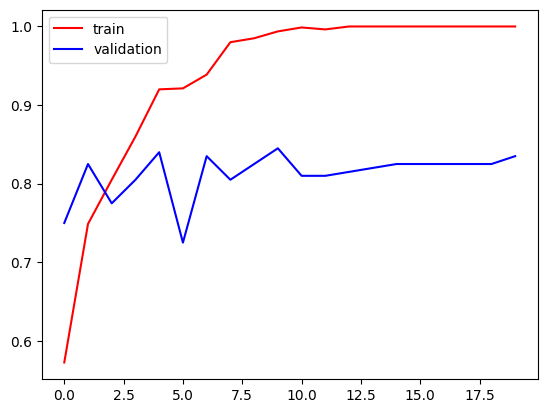

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

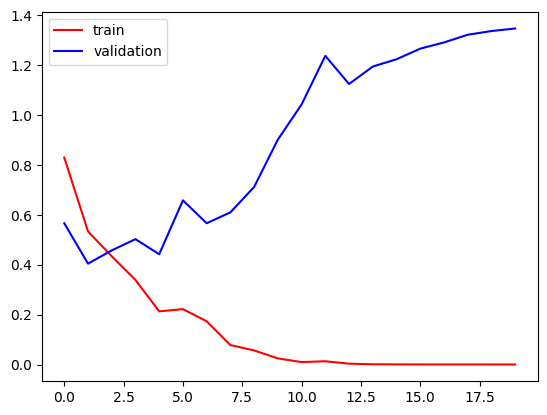

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 304 images belonging to 2 classes.


In [13]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

10/10 [==============================] - 39s 4s/step
[[7.84971844e-03]
 [9.97985721e-01]
 [2.75546317e-05]
 [1.09678749e-02]
 [4.31299595e-05]
 [9.85774040e-01]
 [8.19159269e-01]
 [9.99999940e-01]
 [9.98890042e-01]
 [7.00694047e-19]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999821e-01]
 [9.69567736e-07]
 [1.63607001e-01]
 [4.99390438e-03]
 [6.36530574e-04]
 [1.91504147e-03]
 [9.99463618e-01]
 [1.42268092e-07]
 [4.21173483e-01]
 [1.35687989e-10]
 [9.97632086e-01]
 [4.90249079e-07]
 [1.78436920e-12]
 [9.65854619e-03]
 [1.17251027e-08]
 [1.90565169e-01]
 [1.00000000e+00]
 [2.59070937e-03]
 [3.87859374e-01]
 [2.35034083e-03]
 [9.81789112e-01]
 [3.30921665e-07]
 [9.54768300e-01]
 [3.69055755e-03]
 [9.99998271e-01]
 [9.99948800e-01]
 [7.70903785e-10]
 [3.52523178e-02]
 [7.35954964e-04]
 [1.14420790e-03]
 [6.88541830e-02]
 [7.45272823e-03]
 [1.00000000e+00]
 [9.96717870e-01]
 [9.54809308e-01]
 [8.88510476e-06]
 [9.19123113e-01]
 [9.99835670e-01]
 [1.00000000e+00]
 [9.99950349e-01]
 [1.0000000

In [14]:
len(predictions)

304

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[89 71]
 [74 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       160
           1       0.50      0.49      0.49       144

    accuracy                           0.52       304
   macro avg       0.52      0.52      0.52       304
weighted avg       0.52      0.52      0.52       304



In [17]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [18]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/train (1)'  # Update with your actual path
test_dir = '/content/drive/MyDrive/test (1)'    # Update with your actual path

In [19]:
import os
print(len(os.listdir('/content/drive/MyDrive/train (1)/chihuahua')))
print(len(os.listdir('/content/drive/MyDrive/train (1)/muffin')))
print(len(os.listdir('/content/drive/MyDrive/test (1)/chihuahua')))
print(len(os.listdir('/content/drive/MyDrive/test (1)/muffin')))

500
500
160
144


In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (Muffin vs. chihuahua)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [21]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 1s 0us/step


In [22]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [23]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [24]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
25/25 [==============================] - 266s 10s/step - loss: 2.2778 - accuracy: 0.5362 - val_loss: 1.2792 - val_accuracy: 0.5150
Epoch 2/3
25/25 [==============================] - 286s 12s/step - loss: 0.7984 - accuracy: 0.6375 - val_loss: 0.6158 - val_accuracy: 0.6800
Epoch 3/3
25/25 [==============================] - 251s 10s/step - loss: 0.5754 - accuracy: 0.7163 - val_loss: 0.5266 - val_accuracy: 0.7300


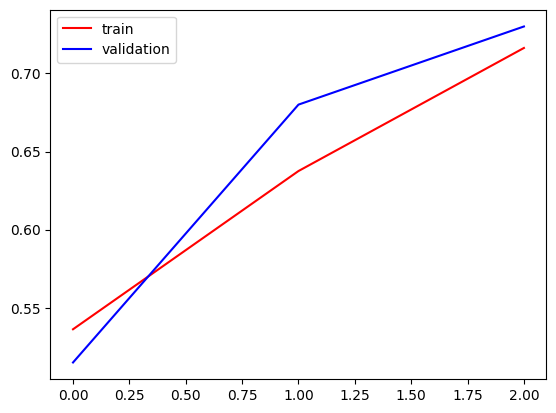

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

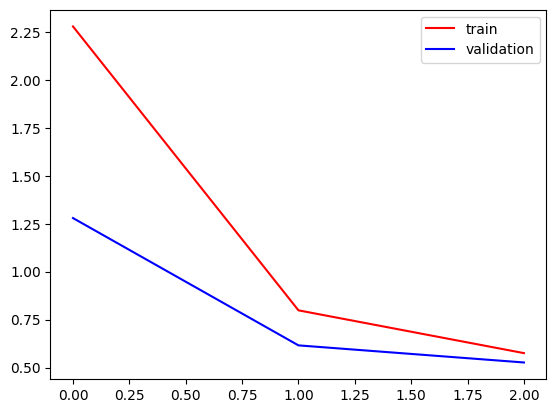

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 304 images belonging to 2 classes.


In [28]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

10/10 [==============================] - 82s 8s/step
[[2.45188788e-01]
 [6.47265971e-01]
 [1.57938629e-01]
 [8.98894668e-01]
 [5.41438699e-01]
 [5.06821036e-01]
 [9.56257164e-01]
 [1.40091792e-01]
 [8.34616780e-01]
 [1.87392861e-01]
 [6.65004477e-02]
 [1.93038285e-01]
 [5.40489912e-01]
 [2.86592603e-01]
 [4.07221215e-03]
 [8.08513165e-01]
 [3.49692732e-01]
 [6.20477021e-01]
 [5.11696815e-01]
 [3.53861064e-01]
 [5.16247809e-01]
 [3.57010067e-01]
 [2.17665181e-01]
 [6.43270075e-01]
 [2.02500746e-01]
 [1.97493061e-01]
 [1.50658324e-01]
 [4.48695630e-01]
 [2.11837098e-01]
 [7.58590043e-01]
 [4.19303477e-01]
 [7.67135620e-01]
 [3.06202739e-01]
 [6.24025583e-01]
 [7.33301163e-01]
 [6.26933992e-01]
 [5.18646091e-02]
 [9.46468592e-01]
 [7.73695171e-01]
 [1.29748851e-01]
 [5.11218965e-01]
 [1.35625184e-01]
 [5.34931123e-01]
 [2.99373507e-01]
 [2.36300707e-01]
 [4.26598012e-01]
 [8.15729201e-01]
 [4.11799312e-01]
 [1.95901603e-01]
 [6.20956421e-01]
 [3.91559690e-01]
 [2.44337037e-01]
 [3.7932005

In [29]:
len(predictions)

304

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[99 61]
 [80 64]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.62      0.58       160
           1       0.51      0.44      0.48       144

    accuracy                           0.54       304
   macro avg       0.53      0.53      0.53       304
weighted avg       0.53      0.54      0.53       304

